# Project Title

### By: Polina, Tyler Marino

### Notes: Segmentation using Watershed algorithm

import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def watershed():
    root = os.getcwd()
    imgPath = os.path.join('image.jpg')
    
    img = cv2.imread(imgpath)
    cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure()
    plt.subplot(231)
    plt.imshow(img, cmap = 'gray')

    plt.subplot(232)
    _,imgThreshold = cv2.threshold(img, alpha, beta, cv2.THRESH_BINARY_INV)
    plt.imshow(imgThreshold, cmap = 'gray')

    plt.subplot(233)
    #Smooth in some of the contestable points if you have lots of leaf like features #with small space between
    kernel = np.ones((3,3), dtype = np.uint8)
    imgDilate = cv.morphologyEx(imgThreshold, cv.MORPH_DILATE, kernel)
    plt.imshow(imgDilate)

    plt.subplot(234)
    #find distance between curent pixel to nearest 0 val pixel, output is like a heatmap, center of regions perhaps!!
    distTransform = cv.distanceTransform(imageDialate, cv.DIST_L2, 5)
    plt.imshow()

    plt.subplot(235)
    _, distThresh = cv2.threshold(distTrans, min, max, cv2.THRESH_BINARY)
    plt.imshow(distThresh)

    plt.subplot(236)
    distThresh = np.unit8(distThresh)
    _,labels = cv2.connectedComponents(distThresh)
    plt.imshow(labels)

    plt.figure()
    plt.subplot(121)
    labels = np.int32(labels)
    labels = cv2.watershed(imgRGB, labels)
    plt.imshow(labels)
    plt.show()



In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

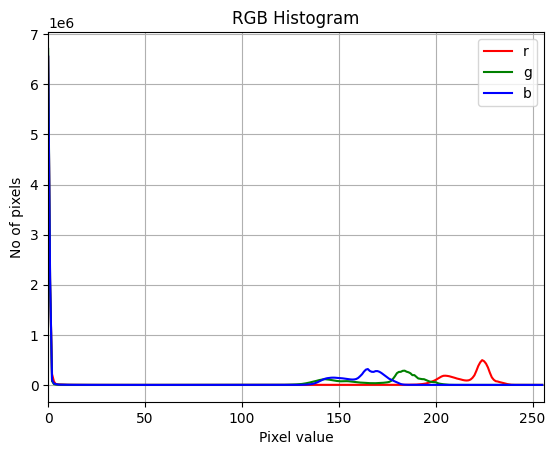

H min: 0 S Min: 0 V Min: 0
H max: 179 S Max: 255 V Max: 255
H mean: 20.94323371548443 S mean: 34.507235833393814 V mean: 95.4888669890405


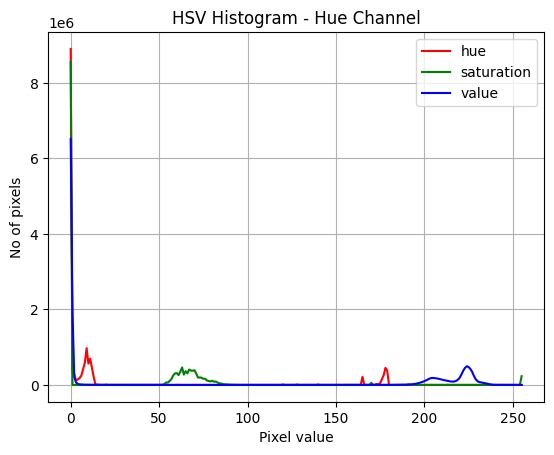

Standard deviation of the translated image:  85.48616127178856
Mean of the translated image:  97.3382346319683


C:\Users\Tyler Marino\AppData\Local\Temp\ipykernel_48508\2454502534.py:55: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(imgRGB_Translate.ravel(),256,[0,256])


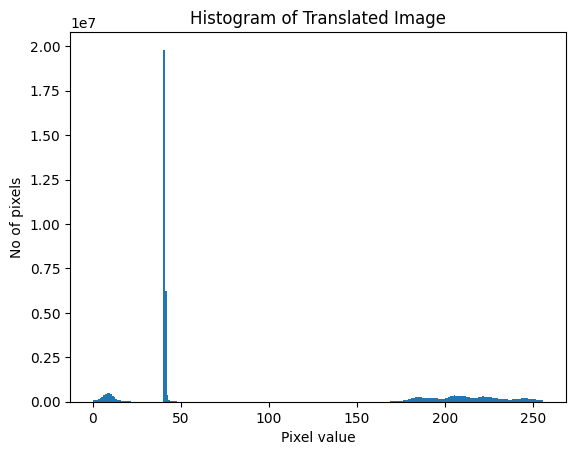

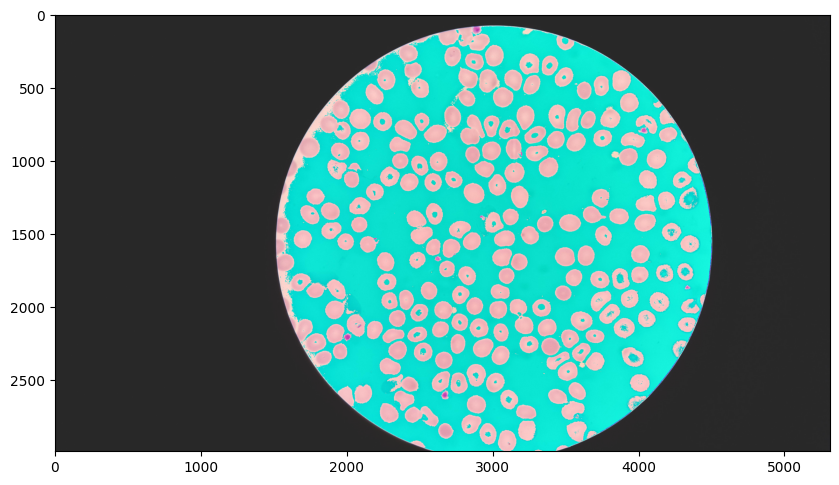

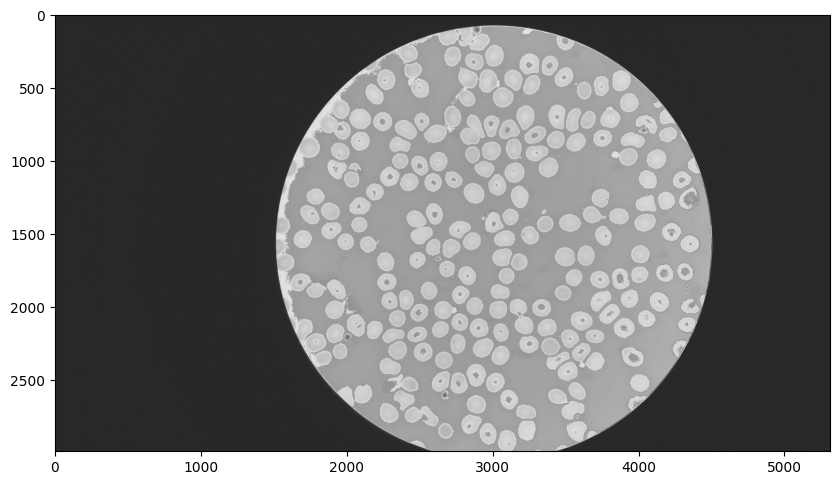

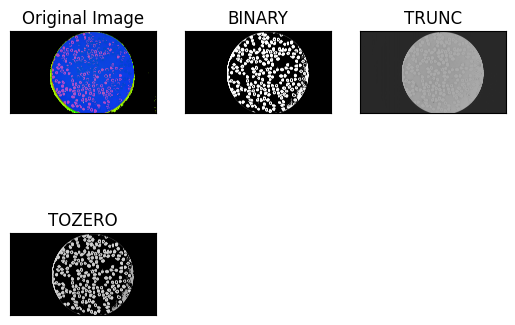

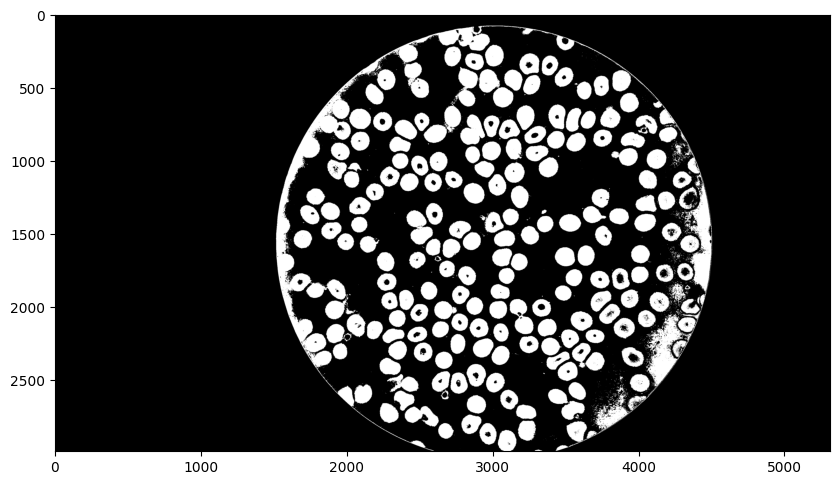

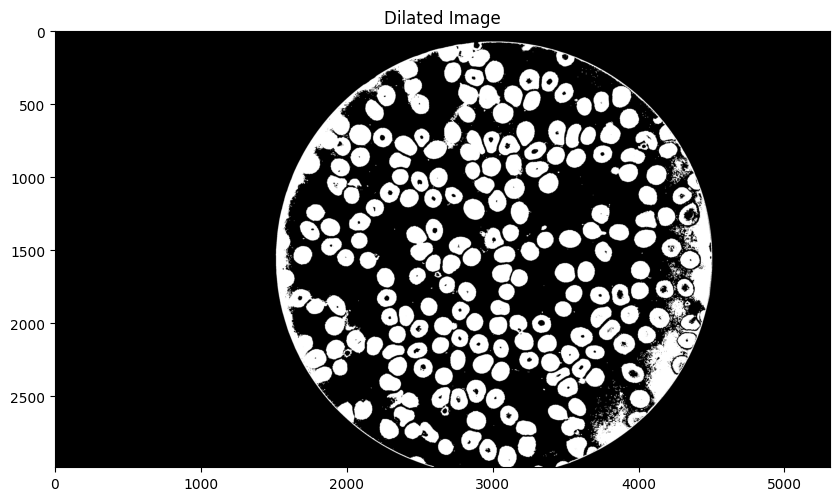

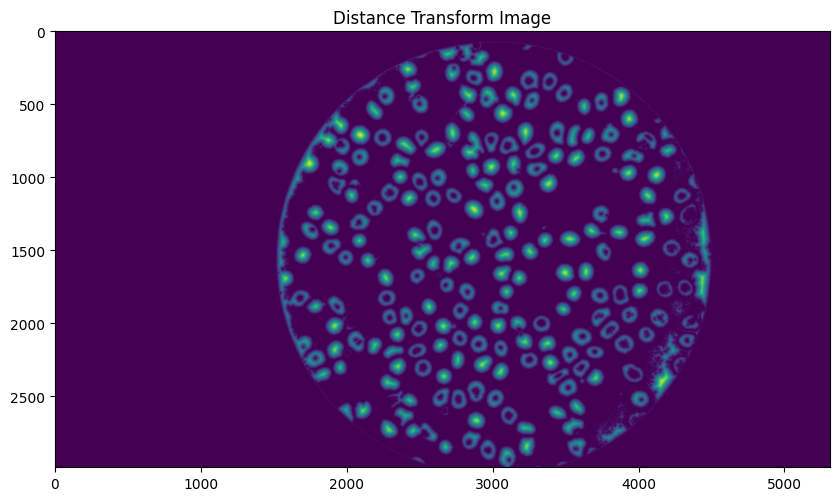

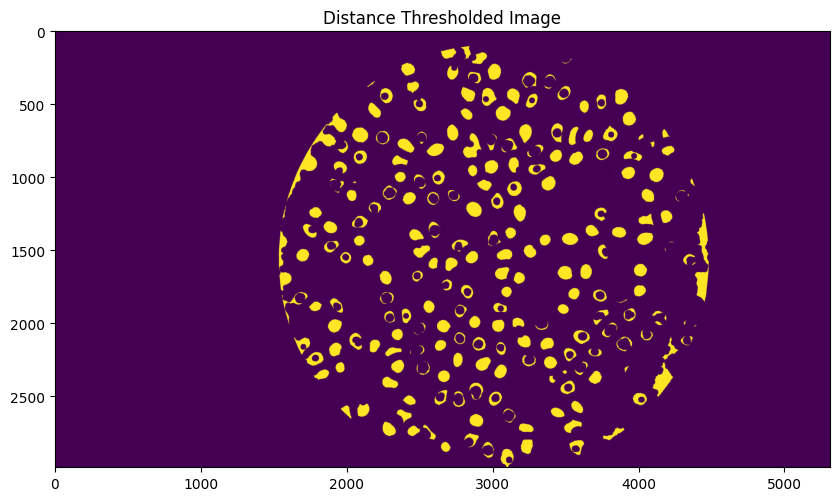

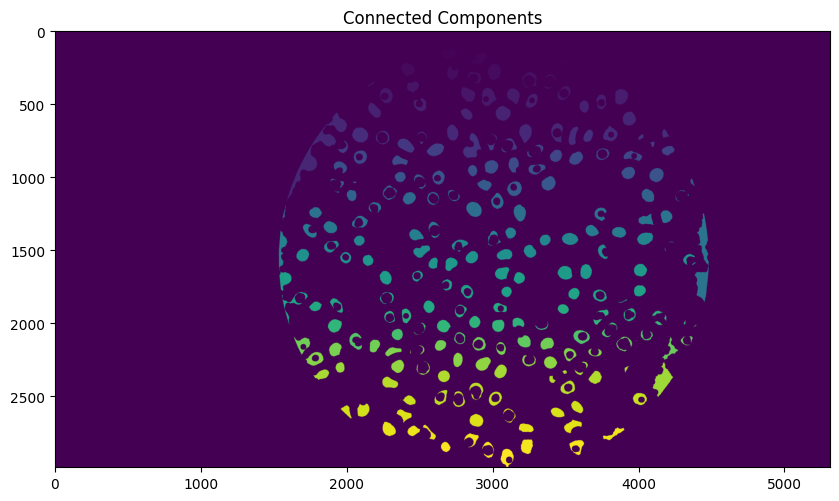

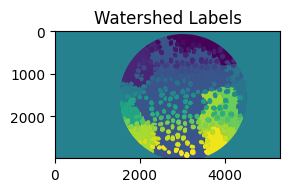

In [ ]:
# Exploring the watershed algorithm for image segmentation

def watershed():
    root = os.getcwd()
    imgPath = os.path.join('Data/SampleBloodCells.jpg')
    
    img= cv2.imread(imgPath)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    imgGraw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # plt.figure()
    # plt.subplot(23)
    # plt.imshow(imgRGB)
    
    #Histogram for each channel
    imgHist = []
    color = ('r','g','b')
    for i,col in enumerate(color):
        hist = cv2.calcHist([imgRGB],[i],None,[256],[0,256])
        imgHist.append(hist)
        plt.plot(hist, color = col)
        plt.xlim([0,256])
    plt.title('RGB Histogram')
    plt.xlabel('Pixel value')
    plt.ylabel('No of pixels')
    plt.legend(color)
    plt.grid()
    plt.show()

    # make histogram in hsv space

    h, s, v = img[:,:,0], img[:,:,1], img[:,:,2]
    #print simple stats
    print("H min:", np.min(h), "S Min:", np.min(s), "V Min:", np.min(v))
    print("H max:", np.max(h), "S Max:", np.max(s), "V Max:", np.max(v))
    print("H mean:", np.mean(h), "S mean:", np.mean(s), "V mean:", np.mean(v))
    #
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="hue")
    plt.plot(hist_s, color='g', label="saturation")
    plt.plot(hist_v, color='b', label="value")
    plt.title('HSV Histogram - Hue Channel')
    plt.xlabel('Pixel value')
    plt.ylabel('No of pixels')
    plt.legend()
    plt.grid()
    plt.show()


    # Original Image
    imgRGB_Translate = imgRGB+40
    print("Standard deviation of the translated image: ",np.std(imgRGB_Translate))
    print("Mean of the translated image: ",np.mean(imgRGB_Translate))
    plt.hist(imgRGB_Translate.ravel(),256,[0,256])
    plt.title('Histogram of Translated Image')
    plt.xlabel('Pixel value')
    plt.ylabel('No of pixels')
    plt.show()
    plt.figure(figsize=(10,7))
    plt.imshow(imgRGB_Translate)
    plt.show()
    Translated_to_Gray = cv2.cvtColor(imgRGB_Translate, cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=(10,7))
    plt.imshow(Translated_to_Gray, cmap='gray')
    plt.show()
    ret,thresh1 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_BINARY)
    # ret,thresh2 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_BINARY_INV)   Can't use this because it inverts the cells to black
    ret,thresh3 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_TRUNC)
    ret,thresh4 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_TOZERO)
    # ret,thresh5 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_TOZERO_INV) Can't use this because it inverts the cells to black
    
    titles = ['Original Image','BINARY','TRUNC','TOZERO']
    images = [img, thresh1, thresh3, thresh4]
    
    for i in range(len(titles)):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    
    plt.show()
    plt.figure(figsize=(10,7))
    plt.imshow(thresh1, cmap='gray')
    plt.show()

    # #Smooth in some of the contestable points if you have lots of leaf like features #with small space between
    plt.figure(figsize=(10,7))
    kernel = np.ones((3,3), dtype = np.uint8)
    imgDilate = cv2.morphologyEx(thresh1, cv2.MORPH_DILATE, kernel)
    plt.imshow(imgDilate, cmap='gray')
    plt.title('Dilated Image')
    plt.show()

    # find distance between curent pixel to nearest 0 val pixel, output is like a heatmap, center of regions perhaps!!
    plt.figure(figsize=(10,7))
    # plt.subplot(234)
    distTransform = cv2.distanceTransform(imgDilate, cv2.DIST_L2, 5)
    plt.imshow(distTransform)
    plt.title('Distance Transform Image')   
    plt.show()
    
    plt.figure(figsize=(10,7))
    _, distThresh = cv2.threshold(distTransform, 20, 255, cv2.THRESH_BINARY)
    plt.imshow(distThresh)
    plt.title('Distance Thresholded Image')
    plt.show()

    plt.figure(figsize=(10,7))
    distThresh = np.uint8(distThresh)
    _,labels = cv2.connectedComponents(distThresh)
    plt.imshow(labels)
    plt.title('Connected Components')
    plt.show()

    plt.figure()
    plt.subplot(121)
    labels = np.int32(labels)
    labels = cv2.watershed(imgRGB, labels)
    plt.imshow(labels)
    plt.title('Watershed Labels')
    plt.show()




watershed()

# Classification

In [ ]:
# Feature Extraction post segmentation

def featureExtraction(path, parasiticCell=True):
    root = os.getcwd()
    imgPath = os.path.join(path)
    
    img= cv2.imread(imgPath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.figure(figsize=(10,7))
    # plt.imshow(img)
    # plt.show()
    # print("Mean value of non-black pixels: ", np.mean(img[img>10]))
    # print("Max value of non-black pixels: ", np.max(img[img>10]))
    # print("Standard Deviation of non-black pixels: ", np.std(img[img>10]))

    hist_r = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([img],[1],None,[256],[0,256])
    hist_b = cv2.calcHist([img],[2],None,[256],[0,256])
    # plt.plot(hist_r, color='r', label="Red Channel")
    # plt.plot(hist_g, color='g', label="Green Channel")
    # plt.plot(hist_b, color='b', label="Blue Channel")
    # plt.title('RGB Histogram')
    # plt.xlabel('Pixel value')
    # plt.ylabel('No of pixels')
    # plt.legend()
    # plt.grid()
    # plt.show()

    imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # plt.figure(figsize=(10,7))
    # plt.imshow(imgGray, cmap='gray')
    # plt.show()
    # print("Mean value of gray image non-black pixels: ", np.mean(imgGray[imgGray>10]))
    # print("Max value of gray image non-black pixels: ", np.max(imgGray[imgGray>10]))
    # print("Standard Deviation of gray image non-black pixels: ", np.std(imgGray[imgGray>10]))
    hist_gray = cv2.calcHist([imgGray],[0],None,[256],[0,256])
    # plt.plot(hist_gray, color='k', label="Gray Channel")
    # plt.title('Gray Histogram')
    # plt.xlabel('Pixel value')
    # plt.ylabel('No of pixels')
    # plt.legend()
    # plt.grid()
    # plt.show()

    #Create clusters in the image with arbitrary number of clusters, perhaps dbscan would be better?
    from sklearn.cluster import KMeans
    imgReshaped = img.reshape((-1,3))
    kmeans = KMeans(n_clusters=3, random_state=0).fit(imgReshaped)
    clustered = kmeans.cluster_centers_[kmeans.labels_]
    clusteredImage = clustered.reshape(img.shape)
    # plt.figure(figsize=(10,7))
    # plt.imshow(np.uint8(clusteredImage))
    # plt.title('Clustered Image with K=3')
    # plt.show()

    # Compare cluster values 
    #count number of pixels in each cluster
    unique, counts = np.unique(kmeans.labels_, return_counts=True)
    # print("Pixel counts per cluster: ", dict(zip(unique, counts)))
    clusterValues = kmeans.cluster_centers_
    # print("Cluster Centers (RGB): ", clusterValues)
    # plt.figure(figsize=(10,7))
    # plt.imshow([clusterValues.astype(np.uint8)])
    # plt.title('Cluster Colors')
    # plt.show()
    variance_between_clusters = np.var(clusterValues, axis=0)
    # print("Variance between cluster centers (RGB): ", variance_between_clusters)
    variance_within_clusters = kmeans.inertia_
    # print("Variance within clusters (Inertia): ", variance_within_clusters)
    # Feature Vector Creation
    # 3 cluster colors, counts, variances, 
    feature_vector = np.concatenate([clusterValues.flatten(), counts, variance_between_clusters, [variance_within_clusters]])
    # print("Feature Vector: ", feature_vector)

    


    # Super pixel segmentation with SLIC
    from skimage.segmentation import slic
    from skimage.color import label2rgb
    segments = slic(img, n_segments=10, compactness=10, sigma=1, start_label=1)
    segmentedImage = label2rgb(segments, img, kind='avg')
    # plt.figure(figsize=(10,7))
    # plt.imshow(np.uint8(segmentedImage))
    # plt.title('Segmented Image with SLIC')
    # plt.show()

    # how to get the colors of colors of the different segments
    uniqueSegments = np.unique(segments)
    segmentColors = []
    for segVal in uniqueSegments:
        mask = segments == segVal
        meanColor = img[mask].mean(axis=0)
        segmentColors.append(meanColor)
    segmentColors = np.array(segmentColors)
    # print("Segment Colors (RGB): ", segmentColors)
    # plt.figure(figsize=(10,7))
    # plt.imshow([segmentColors.astype(np.uint8)])
    # plt.title('Segment Colors')

    # plt.show()
    
# I need to create a feature vector from these values for classification
# create new function that takes in an image and outputs a feature vector
# feature vector could be mean, std, max of each channel, cluster centers and variances
# segment colors and variances
    # print("Mean of segment colors (RGB): ", np.mean(segmentColors, axis=0))
    # print("Standard Deviation of segment colors (RGB): ", np.std(segmentColors, axis=0))
    # print("Max of segment colors (RGB): ", np.max(segmentColors, axis=0))
    variance_between_segments = np.var(segmentColors, axis=0)
    # print("Variance between segment colors (RGB): ", variance_between_segments)
    variance_within_segments = 0
    for segVal in uniqueSegments:
        mask = segments == segVal
        colorsInSegment = img[mask]
        variance_within_segments += np.var(colorsInSegment, axis=0).sum()
    # print("Variance within segments (RGB): ", variance_within_segments)
    return feature_vector


    

In [98]:
featureExtraction('Data/ExampleParasiticCell.png', parasiticCell=False)

array([ 2.18196448e+02,  1.59541879e+02,  1.59180368e+02, -2.84217094e-13,
        4.26325641e-13,  8.52651283e-13,  1.85290323e+02,  9.00524194e+01,
        1.36782258e+02,  1.54790000e+04,  5.28300000e+03,  2.54000000e+02,
        9.22500075e+03,  4.26575939e+03,  4.94993900e+03,  1.91469563e+06])

In [99]:
featureExtraction('Data/ExampleUninfectedCell.png', parasiticCell=True)

array([ 2.19674849e+02,  1.68975675e+02,  1.57109797e+02, -7.67386155e-13,
        1.03739239e-12, -6.53699317e-13,  2.13531308e+02,  1.54588877e+02,
        1.50337693e+02,  4.52400000e+03,  5.52900000e+03,  9.66700000e+03,
        1.04322669e+04,  5.85083108e+03,  5.25897463e+03,  3.30082893e+05])

In [120]:
# Making logistic regression model for classification.

# First gather feature vectors for multiple images of parasitic and uninfected cells
# featureExtraction(parasiticCell=True)
# featureExtraction(parasiticCell=False)
# --- IGNORE ---

# --- IGNORE ---
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
# Sample feature vectors and labels
X = []  # Feature vectors
y = []  # Labels: 1 for parasitic, 0 for uninfected

# All_Data\cell_images is a folder in this local folder that stores all the images of the cells, there are are two subfolders Parasitized and Uninfected

data_dir = 'All_Data/cell_images'
parasitic_dir = os.path.join(data_dir, 'Parasitized')
uninfected_dir = os.path.join(data_dir, 'Uninfected')
i = 1
num_files = len(os.listdir(parasitic_dir))
for filename in os.listdir(parasitic_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):  
        img_path = os.path.join(parasitic_dir, filename)
        feature_vector = featureExtraction(img_path, parasiticCell=True)
        X.append(feature_vector)
        y.append(1)  # Parasitic label
        loading_bar_length = 100
        filled_length = int(loading_bar_length * i // num_files)
        bar = '█' * filled_length + '-' * (loading_bar_length - filled_length)
        print(f'\rInfected File Embedding Progress: |{bar}| {i}/{num_files} Files', end='\r')
        i += 1
print()  # for new line after progress bar


i = 1
num_files = len(os.listdir(uninfected_dir))
for filename in os.listdir(uninfected_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        img_path = os.path.join(uninfected_dir, filename)
        feature_vector = featureExtraction(img_path, parasiticCell=False)
        X.append(feature_vector)
        y.append(0)  # Uninfected label
        loading_bar_length = 100
        filled_length = int(loading_bar_length * i // num_files)
        bar = '█' * filled_length + '-' * (loading_bar_length - filled_length)
        print(f'\rUninfected File Embedding Progress: |{bar}| {i}/{num_files} Files', end='\r')
        i += 1
X = np.array(X)
y = np.array(y)



Infected File Embedding Progress: |███████████████████████████████████████████████████████████████████████████████████████████████████-| 13779/13780 Files


In [121]:
print("shape of X: ", X.shape)
print("shape of Y: ", y.shape)

shape of X:  (27558, 16)
shape of Y:  (27558,)


In [123]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Evaluate model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Save the trained model
dump(model, 'cell_classification_model.joblib')
# Load the trained model
model = load('cell_classification_model.joblib')
# Example prediction on a new image
new_image_path = 'Data/ExampleParasiticCell.png'  # Replace with actual image path
new_feature_vector = featureExtraction(new_image_path, parasiticCell=True)  # or False based on the image
new_feature_vector = new_feature_vector.reshape(1, -1)
prediction = model.predict(new_feature_vector)
print("Predicted class for the new image:", "Parasitic" if prediction[0] == 1 else "Uninfected")

[[2503  212]
 [ 366 2431]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2715
           1       0.92      0.87      0.89      2797

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

Predicted class for the new image: Parasitic


c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\SignalProcessing\SP_Venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
